In [1]:
from gensim import models
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#fichier sous la forme d'un dataframe

glove_model = models.KeyedVectors.load_word2vec_format("../../data/tuning/glove.kv")
data = pd.DataFrame(glove_model.vectors)
data.index = glove_model.index_to_key 

X = data.values
#nombre d'observations n et de variables p
n = data.shape[0]
p = data.shape[1]

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components = p)

pca.fit(X_scaled)
coord = pca.fit_transform(X_scaled)

### Analyse variance 

In [5]:
#variance expliquée
eigval = (n-1)/n*pca.explained_variance_
eigval

array([1.4397998 , 1.4190681 , 1.4111822 , 1.4101582 , 1.40107   ,
       1.3968056 , 1.3859344 , 1.3784744 , 1.3760259 , 1.3691989 ,
       1.3643218 , 1.3626148 , 1.3584752 , 1.3557764 , 1.353176  ,
       1.3502822 , 1.3440349 , 1.3365316 , 1.3353318 , 1.3292927 ,
       1.3233851 , 1.3208476 , 1.319158  , 1.3107312 , 1.3081125 ,
       1.3040699 , 1.3008182 , 1.2993052 , 1.2964357 , 1.2910377 ,
       1.2888057 , 1.2881091 , 1.2808319 , 1.2774571 , 1.2740449 ,
       1.2716453 , 1.268903  , 1.267472  , 1.2620622 , 1.2576314 ,
       1.2546401 , 1.2536347 , 1.2520761 , 1.2489986 , 1.2438825 ,
       1.2426223 , 1.2411633 , 1.2355912 , 1.2298042 , 1.2271321 ,
       1.2240139 , 1.2229127 , 1.2200934 , 1.2186446 , 1.2141949 ,
       1.209156  , 1.2083533 , 1.206188  , 1.2041241 , 1.2014647 ,
       1.1969368 , 1.1960868 , 1.1942307 , 1.1924503 , 1.1877754 ,
       1.1856954 , 1.1843978 , 1.1810561 , 1.1756495 , 1.171512  ,
       1.1701287 , 1.1663094 , 1.1653273 , 1.1646265 , 1.16057

In [6]:
#proportion de variance expliquée
prop_var=pca.explained_variance_ratio_
prop_var

array([0.00479933, 0.00473023, 0.00470394, 0.00470053, 0.00467023,
       0.00465602, 0.00461978, 0.00459491, 0.00458675, 0.004564  ,
       0.00454774, 0.00454205, 0.00452825, 0.00451925, 0.00451059,
       0.00450094, 0.00448012, 0.0044551 , 0.0044511 , 0.00443097,
       0.00441128, 0.00440282, 0.00439719, 0.0043691 , 0.00436037,
       0.0043469 , 0.00433606, 0.00433102, 0.00432145, 0.00430346,
       0.00429602, 0.0042937 , 0.00426944, 0.00425819, 0.00424682,
       0.00423882, 0.00422968, 0.00422491, 0.00420687, 0.0041921 ,
       0.00418213, 0.00417878, 0.00417359, 0.00416333, 0.00414627,
       0.00414207, 0.00413721, 0.00411864, 0.00409935, 0.00409044,
       0.00408005, 0.00407637, 0.00406698, 0.00406215, 0.00404732,
       0.00403052, 0.00402784, 0.00402063, 0.00401375, 0.00400488,
       0.00398979, 0.00398696, 0.00398077, 0.00397483, 0.00395925,
       0.00395232, 0.00394799, 0.00393685, 0.00391883, 0.00390504,
       0.00390043, 0.0038877 , 0.00388442, 0.00388209, 0.00386

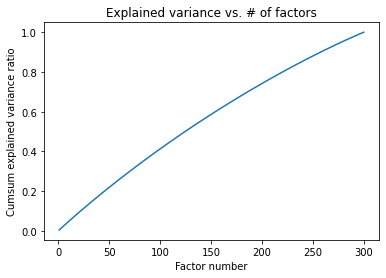

In [7]:
#cumul de variance expliquée

plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

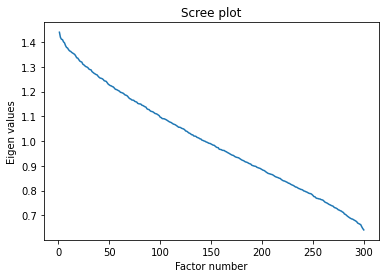

In [8]:
#scree plot

plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

### on garde 250 dimensions

In [9]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components = 250)
reduc_glove_model = pca.fit_transform(X_scaled)

### Graphique

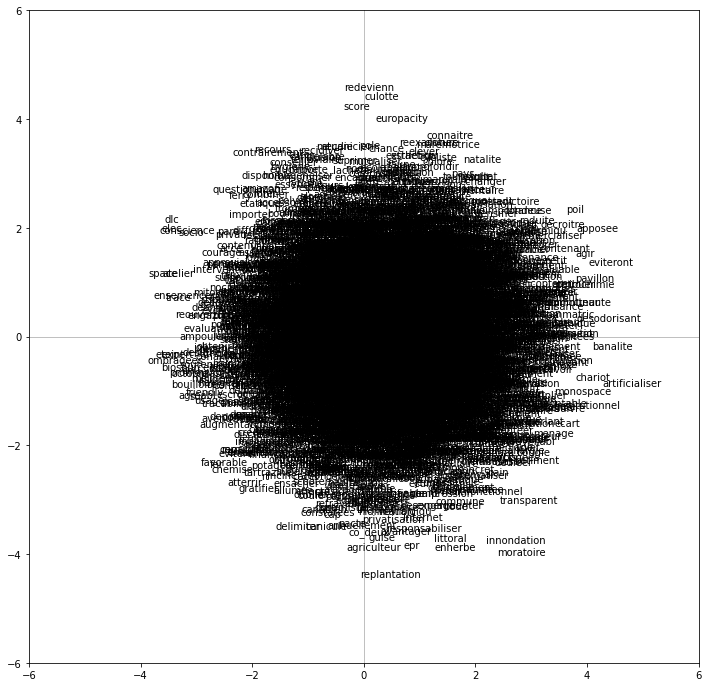

In [34]:
#Individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
 plt.annotate(data.index[i],(reduc_glove_model[i,0],reduc_glove_model[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()